# Machine Learning: Artificial Neural Networks

Instructions
_____________________________

This file contains code that helps you get started. 
You will need to complete the following functions 
 
    - predict.m
    - sigmoidGradient.m
    - randInitializeWeights.m
    - nnCostFunction.m

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

## Import the required packages

In [13]:
import scipy.io
import numpy as np

from predict import predict
from displayData import displayData
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from nnCostFunction import nnCostFunction
from checkNNGradients import checkNNGradients
from fmincg import fmincg

## Setup the parameters you will use for this exercise

In [14]:
input_layer_size = 400;     # 20x20 Input Images of Digits
hidden_layer_size = 25;     # 25 hidden units
num_labels = 10;            # 10 labels, from 0 to 9   
                            # (note that we have mapped "0" to label 9 to follow
                            # the same structure used in the MatLab version)

# =========== Part 1: Loading and Visualizing Data =============
We start the exercise by first loading and visualizing the dataset. 
You will be working with a dataset that contains handwritten digits.

## Load Training Data

Loading and Visualizing Data ...


C:\Users\33789\displayData.py:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(np.sqrt(data.shape[0]), np.sqrt(data.shape[0]), i+1)


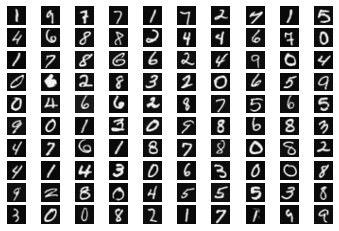

In [15]:
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('C:/Users/33789/Downloads/Jupyter/Jupyter/Initial code/digitdata.mat')
X = mat['X']
y = mat['y']
y = np.squeeze(y)
m, _ = np.shape(X)

# Randomly select 100 data points to display
sel = np.random.choice(range(X.shape[0]), 100)
sel = X[sel,:]

displayData(sel)

# ================ Part 2: Loading Pameters ================
In this part of the exercise, we load some pre-initialized neural network parameters.

In [16]:
print('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('C:/Users/33789/Downloads/Jupyter/Jupyter/Initial code/debugweights.mat');

# Unroll parameters
Theta1 = mat['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = mat['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

Loading Saved Neural Network Parameters ...


# ================= Part 3: Implement Predict =================
After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the neural network to predict the labels of the training set. This lets you compute the training set accuracy.

In [17]:
pred = predict(Theta1, Theta2, X);
print('Training Set Accuracy: ', (pred == y).mean()*100)

Training Set Accuracy:  97.52


In [18]:
from sigmoid import sigmoid

def predict(Theta1, Theta2, X):
# Useful values
    m = np.shape(X)[0]              #number of examples
    # You need to return the following variables correctly 
    p = np.zeros(m);


# ====================== YOUR CODE HERE ======================
# Instructions: Complete the following code to make predictions using
#               your learned neural network. You should set p to a 
#               vector containing labels between 1 to num_labels.
#
    
    #add "bias" term to the X-matrix since it doesnt contain a col of only 1's
    newX = np.append(np.ones((m, 1)),X, axis = 1)
    
    #we must multiply tehta(edge weighs) to the nodes 
    
    z2 = np.dot( newX, Theta1.T)
    a2 = sigmoid(z2)
    
    newA2 = np.append(np.ones((m, 1)), a2, axis= 1)
    z3= np.dot( newA2, Theta2.T)
    a3 = sigmoid(z3)
    #thsi retrns the index col with teh max value 
    p = np.argmax(a3, axis= 1)
    #add +1 inorder to keep with teh convention of indexes
    
    return p+1


In [19]:
pred = predict(Theta1, Theta2, X);
print('Training Set Accuracy: ', (pred == y).mean()*100)

Training Set Accuracy:  97.52


##  Testing (you can skip this block)
To give you an idea of the network's output, you can also run through the examples one at the a time to see what it is predicting. Run the code in the following block to view examples.

**NOTE:** to avoid the printing of all the sample instances, you can replace *range(m)* with a small number

I delete this previous block because downloading it, it kept all figures and it took many pages 

# ================ Part 4: Sigmoid Gradient  ================
Before you start implementing backpropagation, you will first implement the gradient for the sigmoid function. You should complete the code in the sigmoidGradient.m file.

In [20]:
print('Evaluating sigmoid gradient...')
example = np.array([-15, -1, -0.5, 0, 0.5, 1, 15])
g = sigmoidGradient(example)
print('Sigmoid gradient evaluated at', example, ':')
print(g)

Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-15.   -1.   -0.5   0.    0.5   1.   15. ] :
[3.05902133e-07 1.96611933e-01 2.35003712e-01 2.50000000e-01
 2.35003712e-01 1.96611933e-01 3.05902133e-07]


# ================ Part 5: Initializing Pameters ================
To learn a two layer neural network that classifies digits. You will start by implementing a function to initialize the weights of the neural network (randInitializeWeights.py)

In [21]:
import numpy as np
import random

def randInitializteWeights(L_in, L_out):
#RANDINITIALIZEWEIGHTS Randomly initialize the weights of a layer with L_in
#incoming connections and L_out outgoing connections
#   W = RANDINITIALIZEWEIGHTS(L_in, L_out) randomly initializes the weights 
#   of a layer with L_in incoming connections and L_out outgoing 
#   connections. 
#
    #   Note that W should be set to a matrix of size(L_out, 1 + L_in) as
#   the first row of W handles the "bias" terms
#

# You need to return the following variables correctly 
    W = np.zeros((L_out,  L_in))
   # one = np.ones((W.shape[0], 1))
    #W = np.append(one, W, axis= 1)
    epsilon = 0.12
    W =  2 * np.random.rand(L_out, L_in) * epsilon - epsilon
    
# =========================================================================

    return W


In [22]:
print('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_Theta1 = np.reshape(initial_Theta1, initial_Theta1.size, order='F')
initial_Theta2 = np.reshape(initial_Theta2, initial_Theta2.size, order='F')
initial_nn_params = np.hstack((initial_Theta1, initial_Theta2))
print(initial_nn_params)

Initializing Neural Network Parameters ...
[ 0.05273472 -0.03971493 -0.08579042 ... -0.04430189 -0.01175109
 -0.06214446]


# =============== Part 6: Implement Backpropagation ===============
Now you will implement the backpropagation algorithm for the neural network. You should add code to nnCostFunction.m to return the partial derivatives of the parameters.

In [23]:
print('Checking Backpropagation...')

#  Check gradients by running checkNNGradients
checkNNGradients()

Checking Backpropagation...
[[-9.27825235e-03]
 [ 8.89911959e-03]
 [-8.36010761e-03]
 [ 7.62813551e-03]
 [-6.74798369e-03]
 [-3.04978931e-06]
 [ 1.42869450e-05]
 [-2.59383093e-05]
 [ 3.69883213e-05]
 [-4.68759764e-05]
 [-1.75060084e-04]
 [ 2.33146356e-04]
 [-2.87468729e-04]
 [ 3.35320347e-04]
 [-3.76215588e-04]
 [-9.62660640e-05]
 [ 1.17982668e-04]
 [-1.37149705e-04]
 [ 1.53247079e-04]
 [-1.66560297e-04]
 [ 3.14544970e-01]
 [ 1.11056588e-01]
 [ 9.74006970e-02]
 [ 1.64090819e-01]
 [ 5.75736494e-02]
 [ 5.04575855e-02]
 [ 1.64567932e-01]
 [ 5.77867378e-02]
 [ 5.07530173e-02]
 [ 1.58339334e-01]
 [ 5.59235296e-02]
 [ 4.91620841e-02]
 [ 1.51127527e-01]
 [ 5.36967009e-02]
 [ 4.71456249e-02]
 [ 1.49568335e-01]
 [ 5.31542052e-02]
 [ 4.65597186e-02]] [[-2.30620905e-02]
 [-2.30540813e-02]
 [-2.30981417e-02]
 [-2.30694760e-02]
 [-2.30492824e-02]
 [-8.11990799e-05]
 [-8.01512273e-05]
 [-8.10119786e-05]
 [-8.13436615e-05]
 [-8.02070103e-05]
 [-5.69954019e-04]
 [-5.69553746e-04]
 [-5.70468842e-04]
 [

So I am not sure why I get such a high difference, I have reviewed the code but I dont know where the mistake is. 

# =============== Part 7: Implement Regularization ===============
Once your backpropagation implementation is correct, you should now continue to implement the regularization gradient.

In [24]:
print('Checking Backpropagation (w/ Regularization) ... ')

##  Check gradients by running checkNNGradients
lambda_value = 3
checkNNGradients(lambda_value)

# Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                          num_labels, X, y, lambda_value)

print('Cost at (fixed) debugging parameters (w/ lambda = 10): ',  debug_J[0][0], 
      '(this value should be about 0.576051)')

Checking Backpropagation (w/ Regularization) ... 
[[-9.27825235e-03]
 [ 8.89911959e-03]
 [-8.36010761e-03]
 [ 7.62813551e-03]
 [-6.74798369e-03]
 [-1.67679797e-02]
 [ 3.94334829e-02]
 [ 5.93355565e-02]
 [ 2.47640974e-02]
 [-3.26881426e-02]
 [-6.01744725e-02]
 [-3.19612287e-02]
 [ 2.49225535e-02]
 [ 5.97717617e-02]
 [ 3.86410548e-02]
 [-1.73704651e-02]
 [-5.75658668e-02]
 [-4.51963845e-02]
 [ 9.14587966e-03]
 [ 5.46101547e-02]
 [ 3.14544970e-01]
 [ 1.11056588e-01]
 [ 9.74006970e-02]
 [ 1.18682669e-01]
 [ 3.81928689e-05]
 [ 3.36926556e-02]
 [ 2.03987128e-01]
 [ 1.17148233e-01]
 [ 7.54801264e-02]
 [ 1.25698067e-01]
 [-4.07588279e-03]
 [ 1.69677090e-02]
 [ 1.76337550e-01]
 [ 1.13133142e-01]
 [ 8.61628953e-02]
 [ 1.32294136e-01]
 [-4.52964427e-03]
 [ 1.50048382e-03]] [[-0.02306209]
 [-0.02305408]
 [-0.02309814]
 [-0.02306948]
 [-0.02304928]
 [-0.01684613]
 [ 0.03933904]
 [ 0.05928048]
 [ 0.02464577]
 [-0.03272147]
 [-0.06056937]
 [-0.03276393]
 [ 0.02463955]
 [ 0.05886633]
 [ 0.03844778]
 [

At least after regularization the relative difference is lower  

# =================== Part 8: Training NN ===================
You have now implemented all the code necessary to train a neural network. To train your neural network, we will now use "fmincg", which is a function which works similarly to "fminunc". Recall that these advanced optimizers are able to train our cost functions efficiently as long as we provide them with the gradient computations.

In [29]:
print('Training Neural Network...')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
MaxIter = 150

#  You should also try different values of lambda
lambda_value = 5

# Create "short hand" for the cost function to be minimized
y = np.expand_dims(y, axis=1)

costFunction = lambda p : nnCostFunction(p, input_layer_size, hidden_layer_size, 
                                         num_labels, X, y, lambda_value)

# Now, costFunction is a function that takes in only one argument (the
# neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, MaxIter)

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[0:hidden_layer_size * (input_layer_size + 1)], 
                              (hidden_layer_size, (input_layer_size + 1)), order='F')
Theta2 = np.reshape(nn_params[((hidden_layer_size * (input_layer_size + 1))):],
                              (num_labels, (hidden_layer_size + 1)), order='F')

Training Neural Network...


ValueError: cannot reshape array of size 225 into shape (10,26)

sadly I can't perform any tests on the parameters :(

# ================= Part 9: Visualize Weights =================
You can now "visualize" what the neural network is learning by displaying the hidden units to see what features they are capturing in the data.


Visualizing Neural Network... 



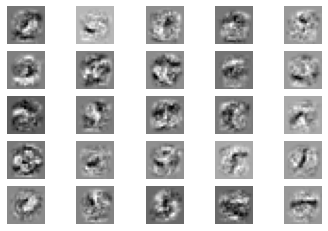

In [27]:
print('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:])

# ============= Part 10: Predicting with learned weights =======
After training the neural network, we would like to use it to predict the labels. The already implemented "predict" function is used by neural network to predict the labels of the training set. This letsyou compute the training set accuracy.

In [28]:
pred = predict(Theta1, Theta2, X)
pred = np.expand_dims(pred,axis=1)
print('Training Set Accuracy: ', (pred == y).mean()*100)

Training Set Accuracy:  10.0


##### its very unfortunate that I wasn't able to perform any experiments , it would be nice to know if we can reach any assistant even after the tutorial for asking some question 
